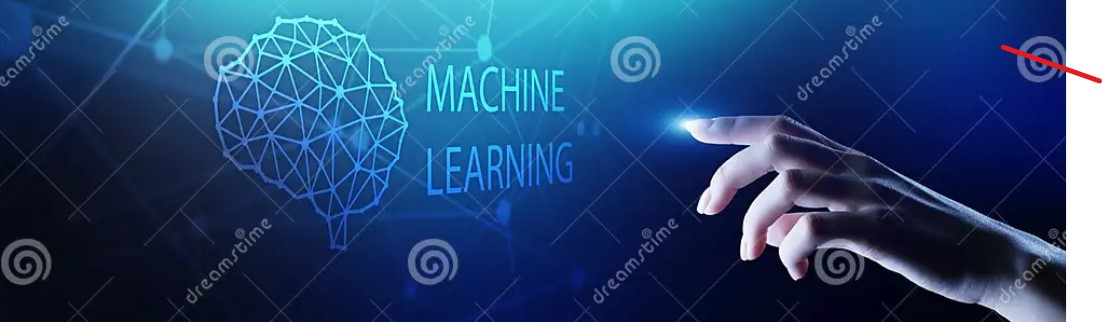

# AISC2000 Final - Case Study 2
## subbmited to: Usman Ahmad
## submitted by: Group F
|Name | Student ID| contribution|
|-----------|---------|-------------|
|Poojaben Dilipbhai Katrodiya |500221151|20%|
|Deep Amrishkumar lad | 500219245 | 20%|
|Priyankkumar Mahendrabhai Patel |  500208928 | 20%|
|Ritik jain | 500220774|20%|
|Marcus Vinicius de Silva Fernandes |   500221252 |20%|




In [1]:
!pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from imblearn.under_sampling import RandomUnderSampler, NearMiss, ClusterCentroids, EditedNearestNeighbours 


import warnings
warnings.filterwarnings('ignore')


# (a). Study the dataset, identify the independent and target variables.

In [3]:
data = pd.read_csv('HTRU_2.csv')

# Set column headers
column_names = ["profile_mean", "profile_std", "profile_excess_kurtosis", "profile_skewness", "dmsnr_mean", "dmsnr_std", "dmsnr_excess_kurtosis", "dmsnr_skewness", "class"]  
data.columns = column_names
data


,profile_mean,profile_std,profile_excess_kurtosis,profile_skewness,dmsnr_mean,dmsnr_std,dmsnr_excess_kurtosis,dmsnr_skewness,class
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   profile_mean             17897 non-null  float64
 1   profile_std              17897 non-null  float64
 2   profile_excess_kurtosis  17897 non-null  float64
 3   profile_skewness         17897 non-null  float64
 4   dmsnr_mean               17897 non-null  float64
 5   dmsnr_std                17897 non-null  float64
 6   dmsnr_excess_kurtosis    17897 non-null  float64
 7   dmsnr_skewness           17897 non-null  float64
 8   class                    17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
data.describe()

,profile_mean,profile_std,profile_excess_kurtosis,profile_skewness,dmsnr_mean,dmsnr_std,dmsnr_excess_kurtosis,dmsnr_skewness,class
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.00000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419,0.09158
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270,0.28844
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.00000
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119,0.00000
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996,0.00000
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905,0.00000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.00000


In [6]:
X = data.iloc[:,:-1]  #Independent variable
y = data.iloc[:,-1:]  #Target variable
print(X)
print(y)

       profile_mean  profile_std  profile_excess_kurtosis  profile_skewness  \
0        102.507812    58.882430                 0.465318         -0.515088   
1        103.015625    39.341649                 0.323328          1.051164   
2        136.750000    57.178449                -0.068415         -0.636238   
3         88.726562    40.672225                 0.600866          1.123492   
4         93.570312    46.698114                 0.531905          0.416721   
...             ...          ...                      ...               ...   
17892    136.429688    59.847421                -0.187846         -0.738123   
17893    122.554688    49.485605                 0.127978          0.323061   
17894    119.335938    59.935939                 0.159363         -0.743025   
17895    114.507812    53.902400                 0.201161         -0.024789   
17896     57.062500    85.797340                 1.406391          0.089520   

       dmsnr_mean  dmsnr_std  dmsnr_excess_kurtosis

# (b).Check for missing values in the dataset and take action accordingly.

In [7]:
missing_values = data.isnull()
missing_count = data.isnull().sum()
print(missing_count)
print(missing_values)

profile_mean               0
profile_std                0
profile_excess_kurtosis    0
profile_skewness           0
dmsnr_mean                 0
dmsnr_std                  0
dmsnr_excess_kurtosis      0
dmsnr_skewness             0
class                      0
dtype: int64
       profile_mean  profile_std  profile_excess_kurtosis  profile_skewness  \
0             False        False                    False             False   
1             False        False                    False             False   
2             False        False                    False             False   
3             False        False                    False             False   
4             False        False                    False             False   
...             ...          ...                      ...               ...   
17892         False        False                    False             False   
17893         False        False                    False             False   
17894         F

# (C).Visualize outliers for each variable using boxplots. 

## Visualizing Outliers with Boxplots:

profile_mean                  AxesSubplot(0.125,0.11;0.0731132x0.77)
profile_std                AxesSubplot(0.212736,0.11;0.0731132x0.77)
profile_excess_kurtosis    AxesSubplot(0.300472,0.11;0.0731132x0.77)
profile_skewness           AxesSubplot(0.388208,0.11;0.0731132x0.77)
dmsnr_mean                 AxesSubplot(0.475943,0.11;0.0731132x0.77)
dmsnr_std                  AxesSubplot(0.563679,0.11;0.0731132x0.77)
dmsnr_excess_kurtosis      AxesSubplot(0.651415,0.11;0.0731132x0.77)
dmsnr_skewness             AxesSubplot(0.739151,0.11;0.0731132x0.77)
class                      AxesSubplot(0.826887,0.11;0.0731132x0.77)
dtype: object

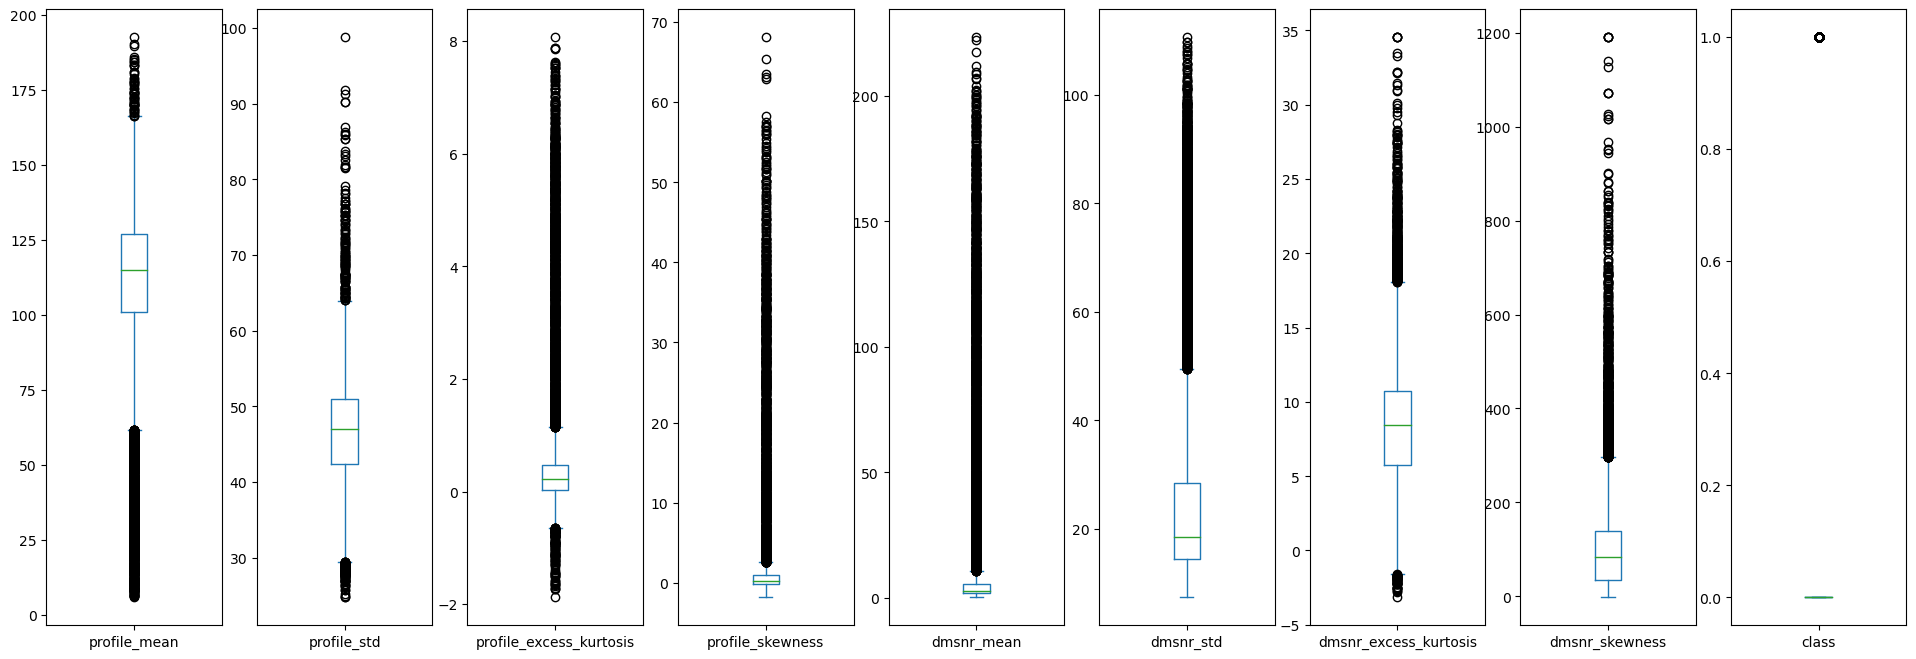

In [8]:
data.plot( kind="box", subplots=True, figsize=(24,8) )

##  Explaining how can we set C parameter value in SVC() (or any other SVM classifier we are using) to handle the outliers properly.

(1). Setting C Parameter in SVM for Handling Outliers:
     
    The C parameter of an SVM classifier influences the trade-off between maximizing margin (hard    margin) and reducing classification errors (soft margin), which impacts outlier treatment:

    •Small C (Large Margin, More Tolerant to Outliers): A smaller C widens class margins, enhancing tolerance for misclassifications and potential outliers. It emphasizes boundary smoothness over perfect point classification.

    •Large C (Smaller Margin, Less Tolerant to Outliers): A larger C narrows the margin, aiming for accurate classification, including outliers. It prioritizes correct classification, possibly leading to a tigher decision boundary. 

(2). Impact on Soft and Hard Margins:

    •Soft Margin: A small C permits more misclassifications, favoring broader class margins. This approach can be effective when managing noise or anomalies, bolstering resistance to noisy data.

    •Hard Margin: A large C minimizes misclassifications, focusing on precise classification. This could lead to a narrower margin, fitting outliers tightly. While beneficial for clear cases, it may amplify sensitivity to outliers and overfitting.


# (d). Check the distribution of the target variable and explain whether it is a balanced or imbalanced dataset. Take proper action accordingly.



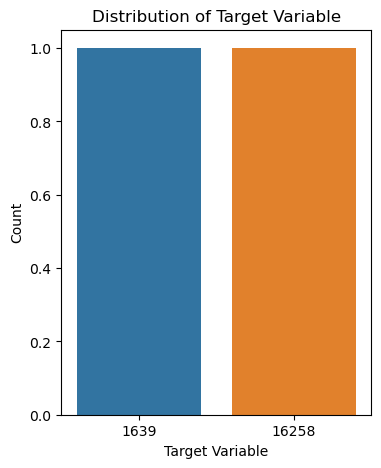

The dataset is imbalanced.


In [9]:
#'y' is the name of your target variable
target_distribution = y.value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(4, 5))
sns.countplot(x=target_distribution)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

# Checking if the dataset is imbalanced
is_imbalanced = target_distribution.min() / target_distribution.max() < 0.5

if is_imbalanced:
    print("The dataset is imbalanced.")
    # we can take appropriate action like using techniques such as oversampling, undersampling, or using specialized algorithms designed for imbalanced data.
else:
    print("The dataset is balanced.")
    # we can proceed with training your classifier without specific balance-related techniques.


### As this dataset is imbalanced we can do oversampling or undersampling.
Oversampling:
•When to Use: Oversampling is generally a good choice when you have a relatively small dataset and the minority class has a small number of samples. It helps create more diverse and representative samples for the minority class.

Undersampling:
•When to Use: Undersampling is useful when the majority class has a large number of samples and you want to reduce its dominance in the dataset.

Here we have large dataset so we are using undersampling to balance our dataset.



In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### To solve imbalanced problem. we can use four methods.
    (1).RandomUnderSampler
    (2).NearMiss
    (3).ClusterCentroids
    (4).EditedNearestNeighbours

#### (1). RandomUnderSampler (from imbalanced-learn):

[('class', 1)]


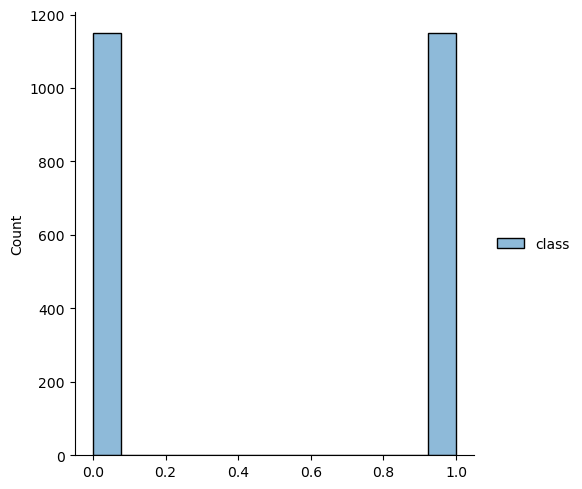

In [11]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled_ru, y_resampled_ru = undersampler.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled_ru).items()))
sns.displot(y_resampled_ru)

#### (2). NearMiss (from imbalanced-learn):

[('class', 1)]


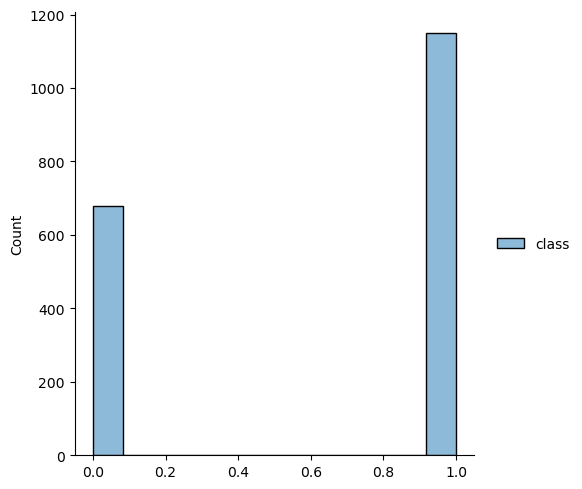

In [12]:
nearmiss = NearMiss(version=3)
X_resampled_nm, y_resampled_nm = nearmiss.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled_nm).items()))
sns.displot(y_resampled_nm)

#### (3). ClusterCentroids (from imbalanced-learn):

[('class', 1)]


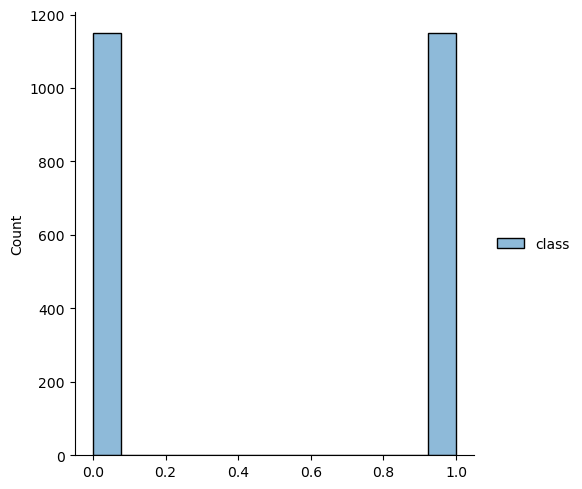

In [13]:
clustercentroids = ClusterCentroids(random_state=42)
X_resampled_cc, y_resampled_cc = clustercentroids.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled_cc).items()))
sns.displot(y_resampled_cc)

#### (4). EditedNearestNeighbours (from imbalanced-learn):

[('class', 1)]


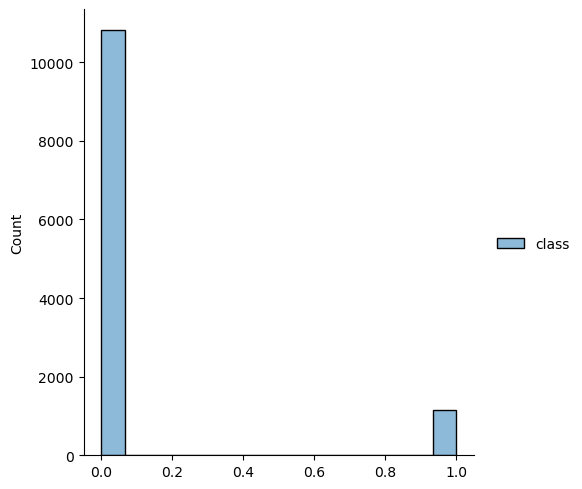

In [14]:
undersampler = EditedNearestNeighbours(n_neighbors=3)
X_resampled_en, y_resampled_en = undersampler.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled_en).items()))
sns.displot(y_resampled_en)

#### 

As we can see, we have applied four methods, and the best result is obtained from the RandomUnderSampler and ClusterCentroids undersampling methods.

# (e).Fit a SVM classifier on the training data with gamma = auto and C/kernel according the table below. 

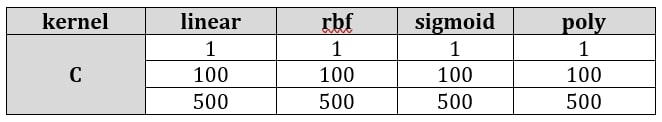

## Scaling data using StandardScaler

In [15]:
sc = StandardScaler()
X_resampled_ru_scaled = sc.fit_transform(X_resampled_ru)
X_test = sc.transform(X_test)

In [16]:
# Using grid search
param_grid = {
    'C' : [1, 100, 500],
    'kernel' : ['linear', 'rbf', 'sigmoid', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_resampled_ru_scaled, y_resampled_ru)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ................................C=1, kernel=sigmoid; total time=   0.0s
[CV] END ................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 100, 500],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             verbose=2)

## (f). Predict the target variable on the testing dataset.

In [17]:
y_pred = grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# (g). Compare the performance e.g., Accuracy of classifications in step (e).


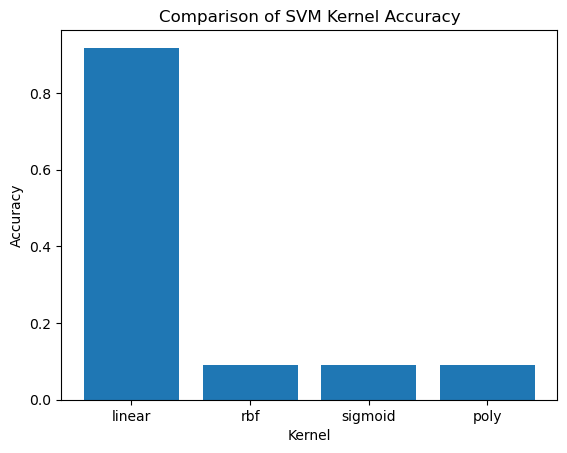

In [18]:
#kernels
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
accuracies = []

# Loop through different kernel options
for kernel in kernels:
    # Train SVM model
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred1 = svm_model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred1)
    accuracies.append(accuracy)

# Create a bar plot to compare accuracy scores
plt.bar(kernels, accuracies)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Comparison of SVM Kernel Accuracy')
plt.show()


## (h). Comment on how changing C affect the performance. 



### Scaling data using Standardscaler

In [19]:
sc = StandardScaler()
X_resampled_ru_scaled = sc.fit_transform(X_resampled_ru)
X_test = sc.transform(X_test)

In [20]:
C_values = [1, 100, 500]
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
for k in kernels:
    print(f"Kernel: {k}")
    for C in C_values:
        model = SVC( kernel=k, C=C, gamma='auto' )
        model.fit(X_resampled_ru_scaled, y_resampled_ru)
        score = model.score(X_test, y_test)

        print(f"C = {C} => {score}")

Kernel: linear
C = 1 => 0.9152700186219739
C = 100 => 0.929608938547486
C = 500 => 0.9307262569832402
Kernel: rbf
C = 1 => 0.9089385474860335
C = 100 => 0.9089385474860335
C = 500 => 0.9089385474860335
Kernel: sigmoid
C = 1 => 0.09106145251396648
C = 100 => 0.09106145251396648
C = 500 => 0.09106145251396648
Kernel: poly
C = 1 => 0.9141527001862197
C = 100 => 0.9089385474860335
C = 500 => 0.9089385474860335


# 
•	When the kernel is linear and C is variable, we observe that increasing the values of C leads to higher accuracy.

•	When the kernels are rbf and sigmoid, and C is variable, we observe no significant change in accuracy as we alter the    values of C.

•	When the kernel is poly and C is variable, we notice that increasing the values of C results in lower accuracy scores.


## (i). Identify any overfitting in classifications from step (e)?.

In [21]:
# The confusion matrix
print(confusion_matrix(y_test, y_pred))

[[4769  112]
 [  38  451]]


In [22]:
# The classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4881
           1       0.80      0.92      0.86       489

    accuracy                           0.97      5370
   macro avg       0.90      0.95      0.92      5370
weighted avg       0.97      0.97      0.97      5370



## 
Based on the confusion matrix, when can a model be considered overfitted?

If the model has more False Positives (FP) or False Negatives (FN) compared to True Positives (TP) and True Negatives (TN), it could suggest overfitting. However, in this case, both FP and FN are fewer than TP and TN.

Overfitting might be present if we observe inconsistent performance metrics (precision, recall, F1-Score). However, upon reviewing our classification report, we can confidently assert that this case is not indicative of overfitting.